<a href="https://colab.research.google.com/github/Schmidtpk/Seminar-EE-LLM/blob/main/example%20notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd # If your example uses DataFrames

Output()

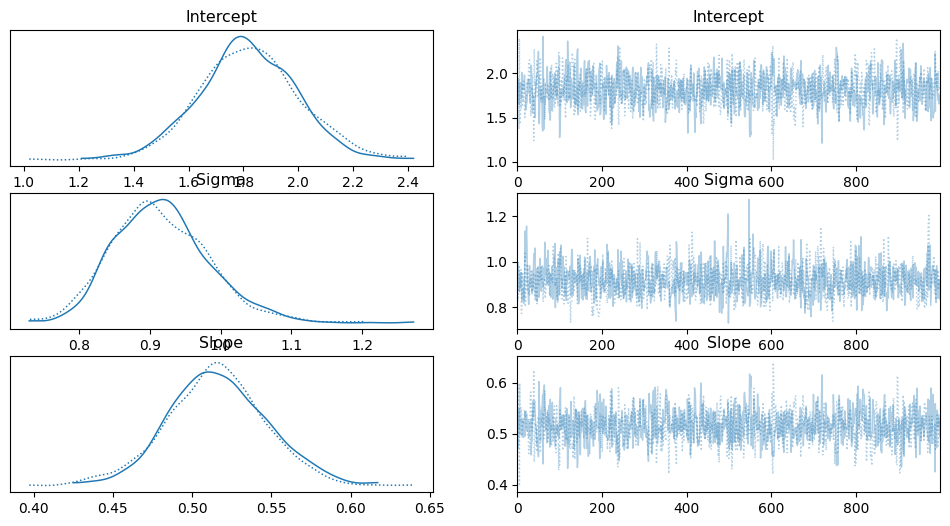

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,1.82,0.18,1.48,2.15,0.01,0.0,1197.97,1073.31,1.0
Sigma,0.92,0.07,0.79,1.04,0.00,0.0,1061.70,849.23,1.0
Slope,0.52,0.03,0.46,0.58,0.00,0.0,1194.85,1090.38,1.0


In [ ]:
# Generate some synthetic data
np.random.seed(42)
n_samples = 100
true_intercept = 2
true_slope = 0.5
x = np.linspace(0, 10, n_samples)
y = true_intercept + true_slope * x + np.random.normal(0, 1, n_samples)

# Define the PyMC model
with pm.Model() as linear_model:
    # Priors for the parameters
    intercept = pm.Normal('Intercept', mu=0, sigma=10)
    slope = pm.Normal('Slope', mu=0, sigma=10)
    sigma = pm.HalfNormal('Sigma', sigma=1)

    # Likelihood of the data
    mu = intercept + slope * x
    likelihood = pm.Normal('Y', mu=mu, sigma=sigma, observed=y)

    # Sample from the posterior distribution
    idata = pm.sample(1000, tune=1000)

# Analyze the results with ArviZ
az.plot_trace(idata)
plt.show()
az.summary(idata, round_to=2)